# Trace Clustering in Process Mining
## BPI CHallenge 2012

## Importing librarires

In [1]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of BPI Challenge 2012. It is in XES format.

In [3]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/BPI_Challenge_2012.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:11<00:00, 1158.55it/s]


## Petrinet from Alpha miner on complete log

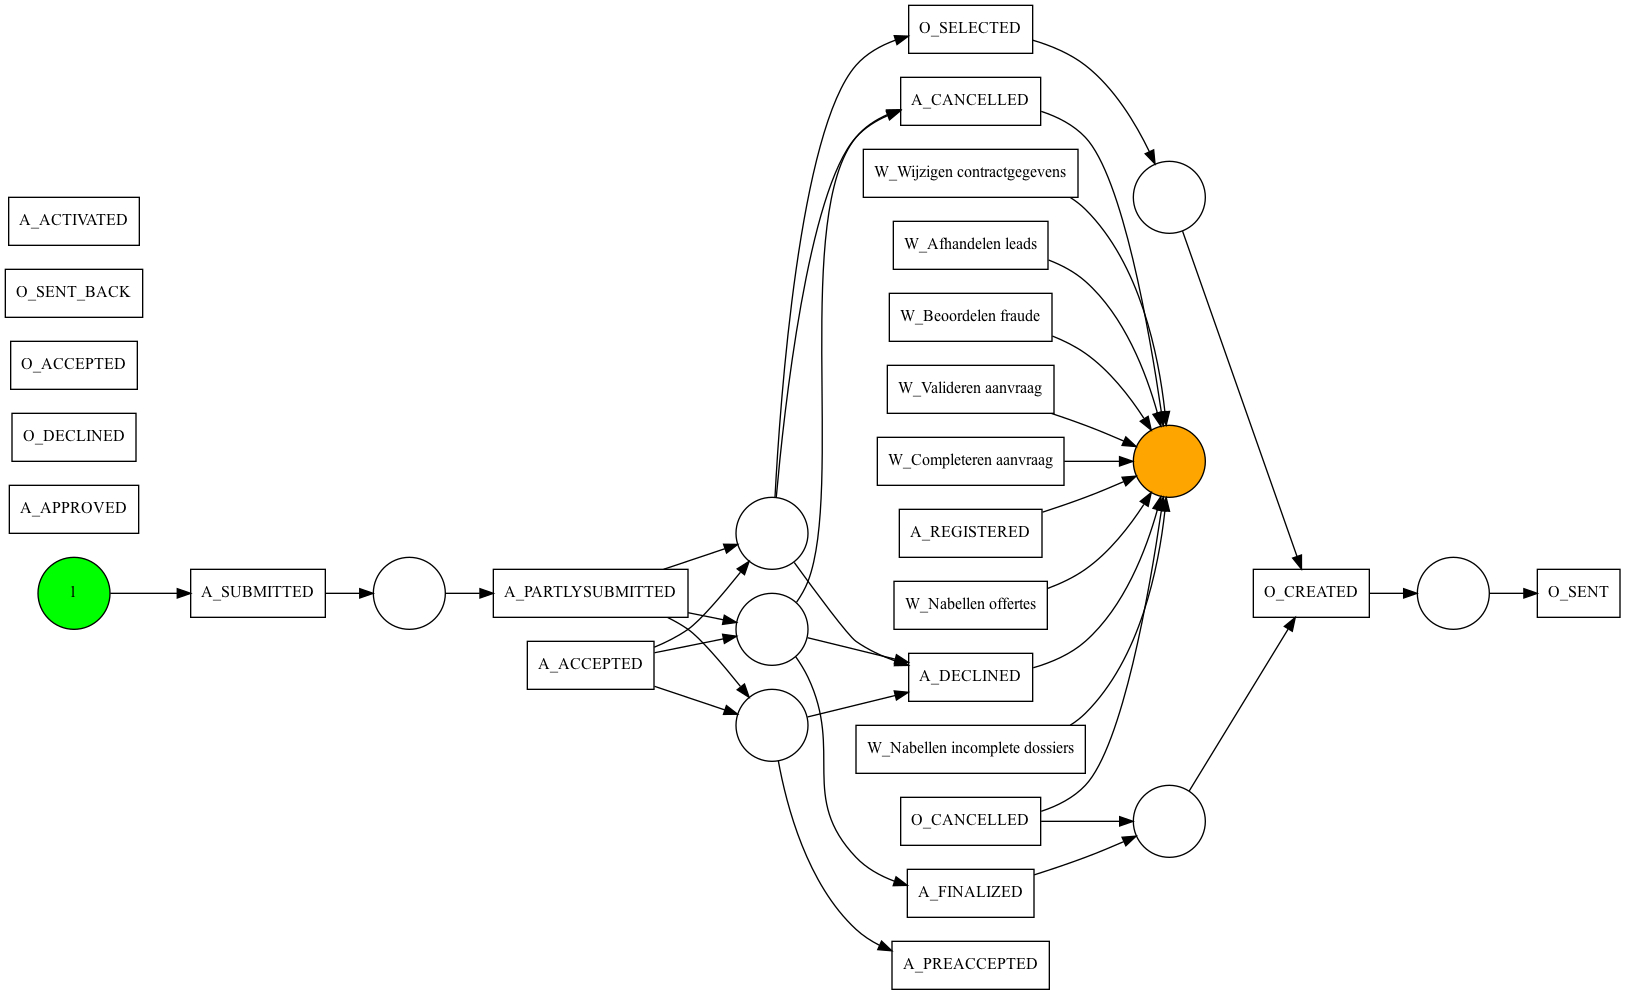

In [4]:
## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness

In [5]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 56841/56841 [03:52<00:00, 244.83it/s]


Fitness of log is:  67.22947077240501 %
Precision of log is:  10.239724412318274 %


In [6]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp = simplicity_evaluator.apply(net)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

Fitness of Petrinet is:  67.22947077240501 %
Precision of Petrinet is:  10.239724412318274 %
Simplicity of Petrinet is:  89.1891891891892 %


### Extracting total Activities

In [12]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities,resources

({'A_SUBMITTED': 13087,
  'A_PARTLYSUBMITTED': 13087,
  'A_PREACCEPTED': 7367,
  'W_Completeren aanvraag': 54850,
  'A_ACCEPTED': 5113,
  'O_SELECTED': 7030,
  'A_FINALIZED': 5015,
  'O_CREATED': 7030,
  'O_SENT': 7030,
  'W_Nabellen offertes': 52016,
  'O_SENT_BACK': 3454,
  'W_Valideren aanvraag': 20809,
  'A_REGISTERED': 2246,
  'A_APPROVED': 2246,
  'O_ACCEPTED': 2243,
  'A_ACTIVATED': 2246,
  'O_CANCELLED': 3655,
  'W_Wijzigen contractgegevens': 12,
  'A_DECLINED': 7635,
  'A_CANCELLED': 2807,
  'W_Afhandelen leads': 16566,
  'O_DECLINED': 802,
  'W_Nabellen incomplete dossiers': 25190,
  'W_Beoordelen fraude': 664},
 {'112': 45687,
  '10862': 492,
  '10913': 6842,
  '11049': 5441,
  '10629': 4975,
  '11120': 705,
  '10809': 4356,
  '10912': 2508,
  '11201': 5995,
  '11119': 6712,
  '10861': 7382,
  '11203': 6294,
  '11181': 7551,
  '11189': 6778,
  '10609': 7049,
  '11111': 39,
  '10982': 5989,
  '11019': 2319,
  '11180': 6777,
  '10899': 4402,
  '10138': 7690,
  '11002': 1971,
 

### Converting activity keys in to a list

In [13]:
activities_array = activities.keys()
activities_array = list(activities_array)
activities_array


['A_SUBMITTED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'W_Completeren aanvraag',
 'A_ACCEPTED',
 'O_SELECTED',
 'A_FINALIZED',
 'O_CREATED',
 'O_SENT',
 'W_Nabellen offertes',
 'O_SENT_BACK',
 'W_Valideren aanvraag',
 'A_REGISTERED',
 'A_APPROVED',
 'O_ACCEPTED',
 'A_ACTIVATED',
 'O_CANCELLED',
 'W_Wijzigen contractgegevens',
 'A_DECLINED',
 'A_CANCELLED',
 'W_Afhandelen leads',
 'O_DECLINED',
 'W_Nabellen incomplete dossiers',
 'W_Beoordelen fraude']

In [19]:
len(activities_array)

24

### Getting activities of each Trace in a Dataframe

In [15]:
## Converting log in to a pandas dataframe
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
dataframe =dataframe[['case:concept:name','concept:name']]
dataframe

,case:concept:name,concept:name
0,173688,A_SUBMITTED
1,173688,A_PARTLYSUBMITTED
2,173688,A_PREACCEPTED
3,173688,W_Completeren aanvraag
4,173688,W_Completeren aanvraag
...,...,...
262195,214376,A_PARTLYSUBMITTED
262196,214376,W_Afhandelen leads
262197,214376,W_Afhandelen leads
262198,214376,A_DECLINED


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [17]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
              'W_Completeren aanvraag', 'W_Completeren aanvraag', 'A_ACCEPTED',
              'O_SELECTED', 'A_FINALIZED', 'O_CREATED', 'O_SENT',
              'W_Nabellen offertes', 'W_Completeren aanvraag',
              'W_Nabellen offertes', 'W_Nabellen offertes',
              'W_Nabellen offertes', 'W_Nabellen offertes',
              'W_Nabellen offertes', 'O_SENT_BACK', 'W_Valideren aanvraag',
              'W_Nabellen offertes', 'W_Valideren aanvraag', 'A_REGISTERED',
              'A_APPROVED', 'O_ACCEPTED', 'A_ACTIVATED', 'W_Valideren aanvraag'],
             dtype=object)                                                       ,
       array(['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
              'W_Completeren aanvraag', 'W_Completeren aanvraag',
              'W_Completeren aanvraag', 'W_Completeren aanvraag', 'A_ACCEPTED',
              'A_FINALIZED', 'O_SELECTED', 'O_CREATED', 'O_SENT',
       

## 2d Vector of Number of CASES X Number of Activities

In [18]:
length  = len(log)
width = len(activities)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
#vectors

(list, 13087)

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [20]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == activities_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == activities_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == activities_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == activities_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == activities_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == activities_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == activities_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == activities_array[7]:
                    vectors[i][7] += 1
                elif events[i][j] == activities_array[8]:
                    vectors[i][8] += 1
                elif events[i][j] == activities_array[9]:
                    vectors[i][9] += 1
                elif events[i][j] == activities_array[10]:
                    vectors[i][10] += 1
                elif events[i][j] == activities_array[11]:
                    vectors[i][11] += 1
                elif events[i][j] == activities_array[12]:
                    vectors[i][12] += 1
                elif events[i][j] == activities_array[13]:
                    vectors[i][13] += 1
                elif events[i][j] == activities_array[14]:
                    vectors[i][14] += 1
                elif events[i][j] == activities_array[15]:
                    vectors[i][15] += 1
                elif events[i][j] == activities_array[16]:
                    vectors[i][16] += 1
                elif events[i][j] == activities_array[17]:
                    vectors[i][17] += 1
                elif events[i][j] == activities_array[18]:
                    vectors[i][18] += 1
                elif events[i][j] == activities_array[19]:
                    vectors[i][19] += 1
                elif events[i][j] == activities_array[20]:
                    vectors[i][20] += 1
                elif events[i][j] == activities_array[21]:
                    vectors[i][21] += 1
                elif events[i][j] == activities_array[22]:
                    vectors[i][22] += 1
                elif events[i][j] == activities_array[23]:
                    vectors[i][23] += 1
               

### Making ND-Array of the Activity Vector

In [22]:
np_vectors = np.array(vectors)
np_vectors,len(np_vectors)

(array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0]]),
 13087)

## Elbow Method to find optimal number of clusters

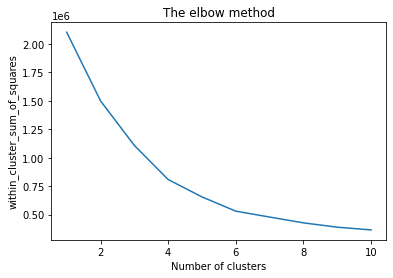

In [23]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [25]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered, len(clustered)


(array([0, 3, 3, ..., 0, 0, 0], dtype=int32), 13087)

## Array of Sizes of clustered Data

In [26]:
count_arr = np.bincount(clustered)
print(count_arr)


[8762  602  909 2814]


## Creating Sub Event Logs based on Clustering Output

In [28]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]
length4 = count_arr[3]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()
sub_log4 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

    elif clustered[i] == 3: 
        sub_log4.append(log[i])

In [29]:
len(sub_log1),len(sub_log2),len(sub_log3),len(sub_log4)

(8762, 602, 909, 2814)

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Alpha miner on Sub Event Log1

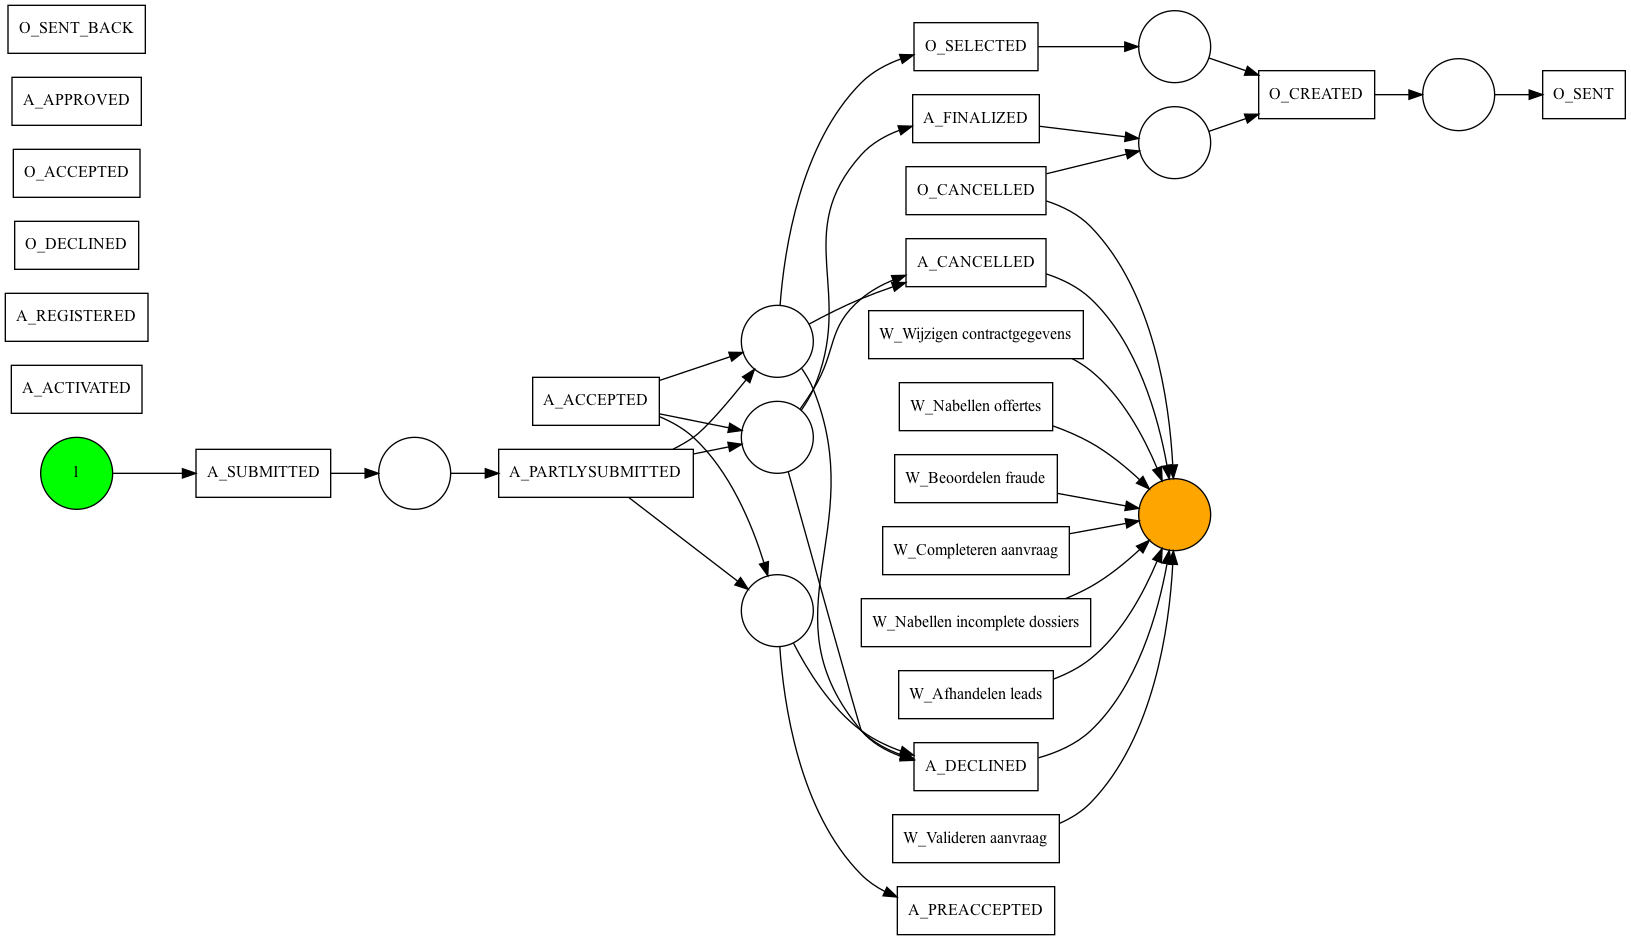

In [30]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [31]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
net, im, fm = alpha_miner.apply(sub_log1)
fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 4784/4784 [00:13<00:00, 356.10it/s]


Fitness of Petrinet is:  78.21427758652544 %
Precision of Petrinet is:  10.683593736543195 %
Simplicity of Petrinet is:  94.28571428571429 %


## Petrinets from Alpha miner on Sub Event Log2

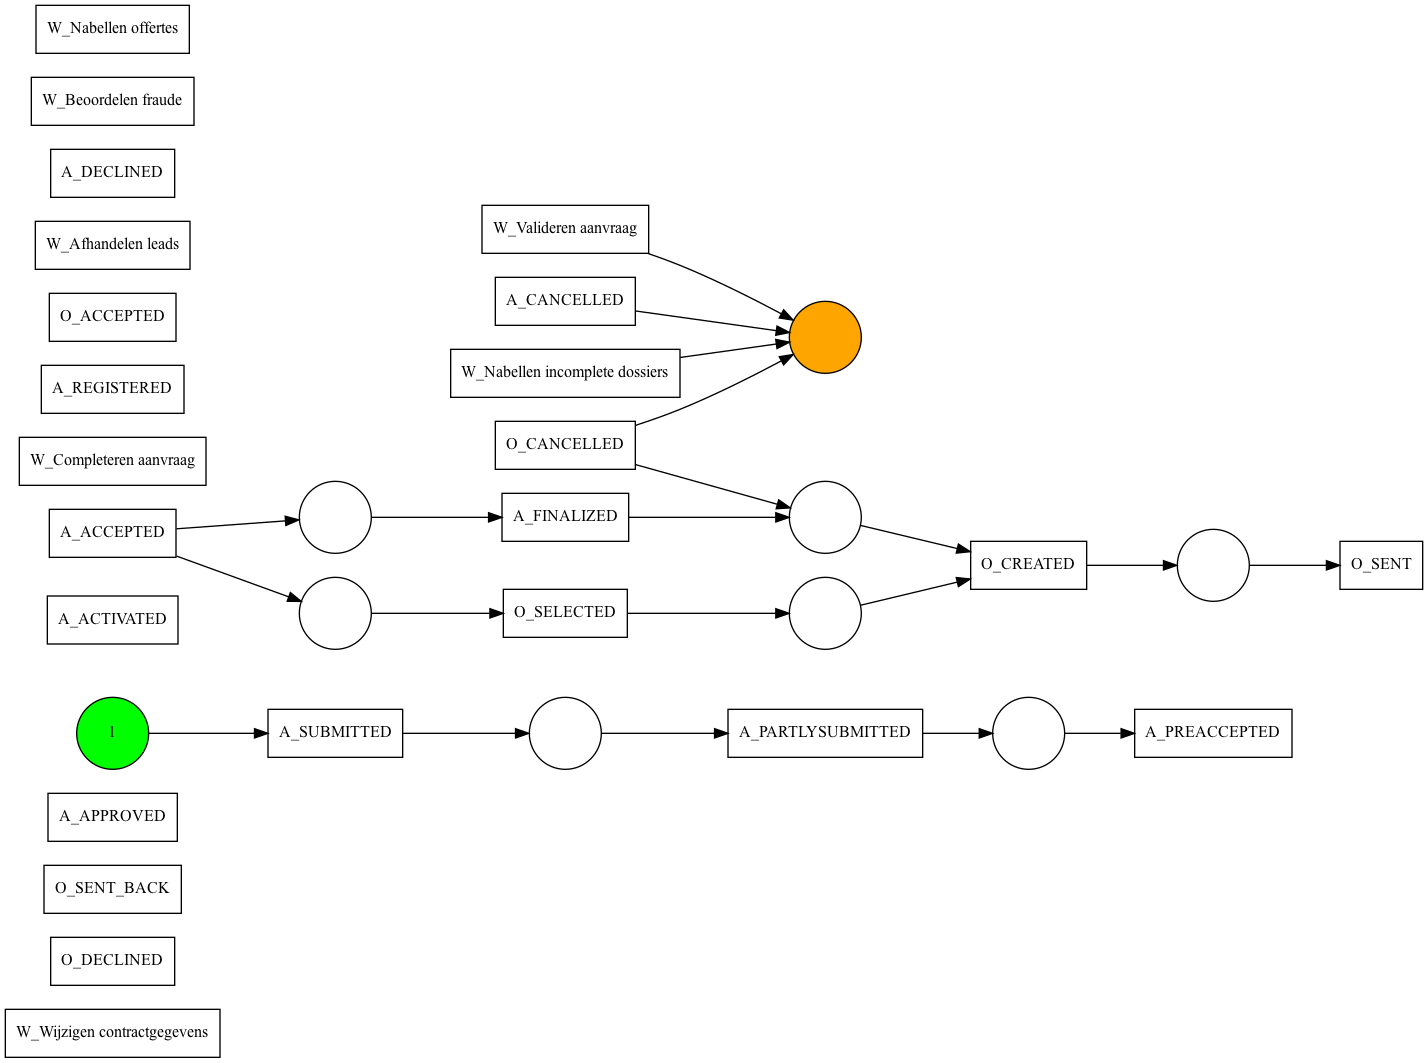

In [32]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [33]:

net, im, fm = alpha_miner.apply(sub_log2)
fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 25794/25794 [01:25<00:00, 302.84it/s]


Fitness of Petrinet is:  58.027832212843656 %
Precision of Petrinet is:  7.246677239391719 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

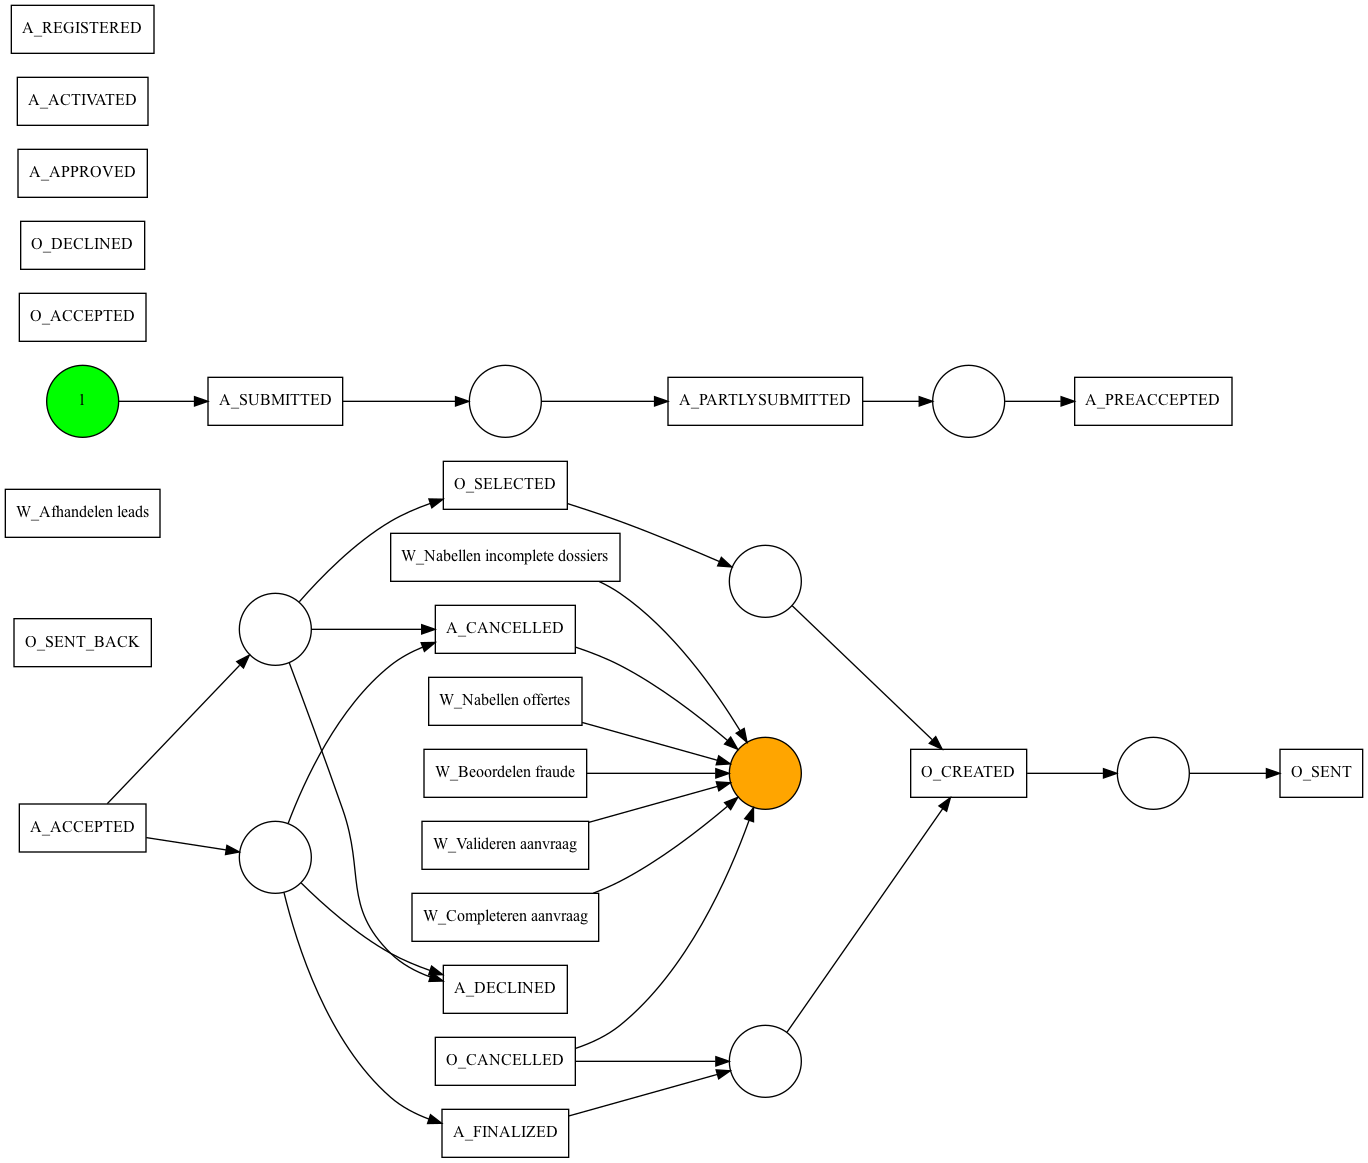

In [34]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [35]:
net, im, fm = alpha_miner.apply(sub_log3)
fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 3152/3152 [00:07<00:00, 415.65it/s]

Fitness of Petrinet is:  46.17497342954635 %
Precision of Petrinet is:  9.656338084681671 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log4

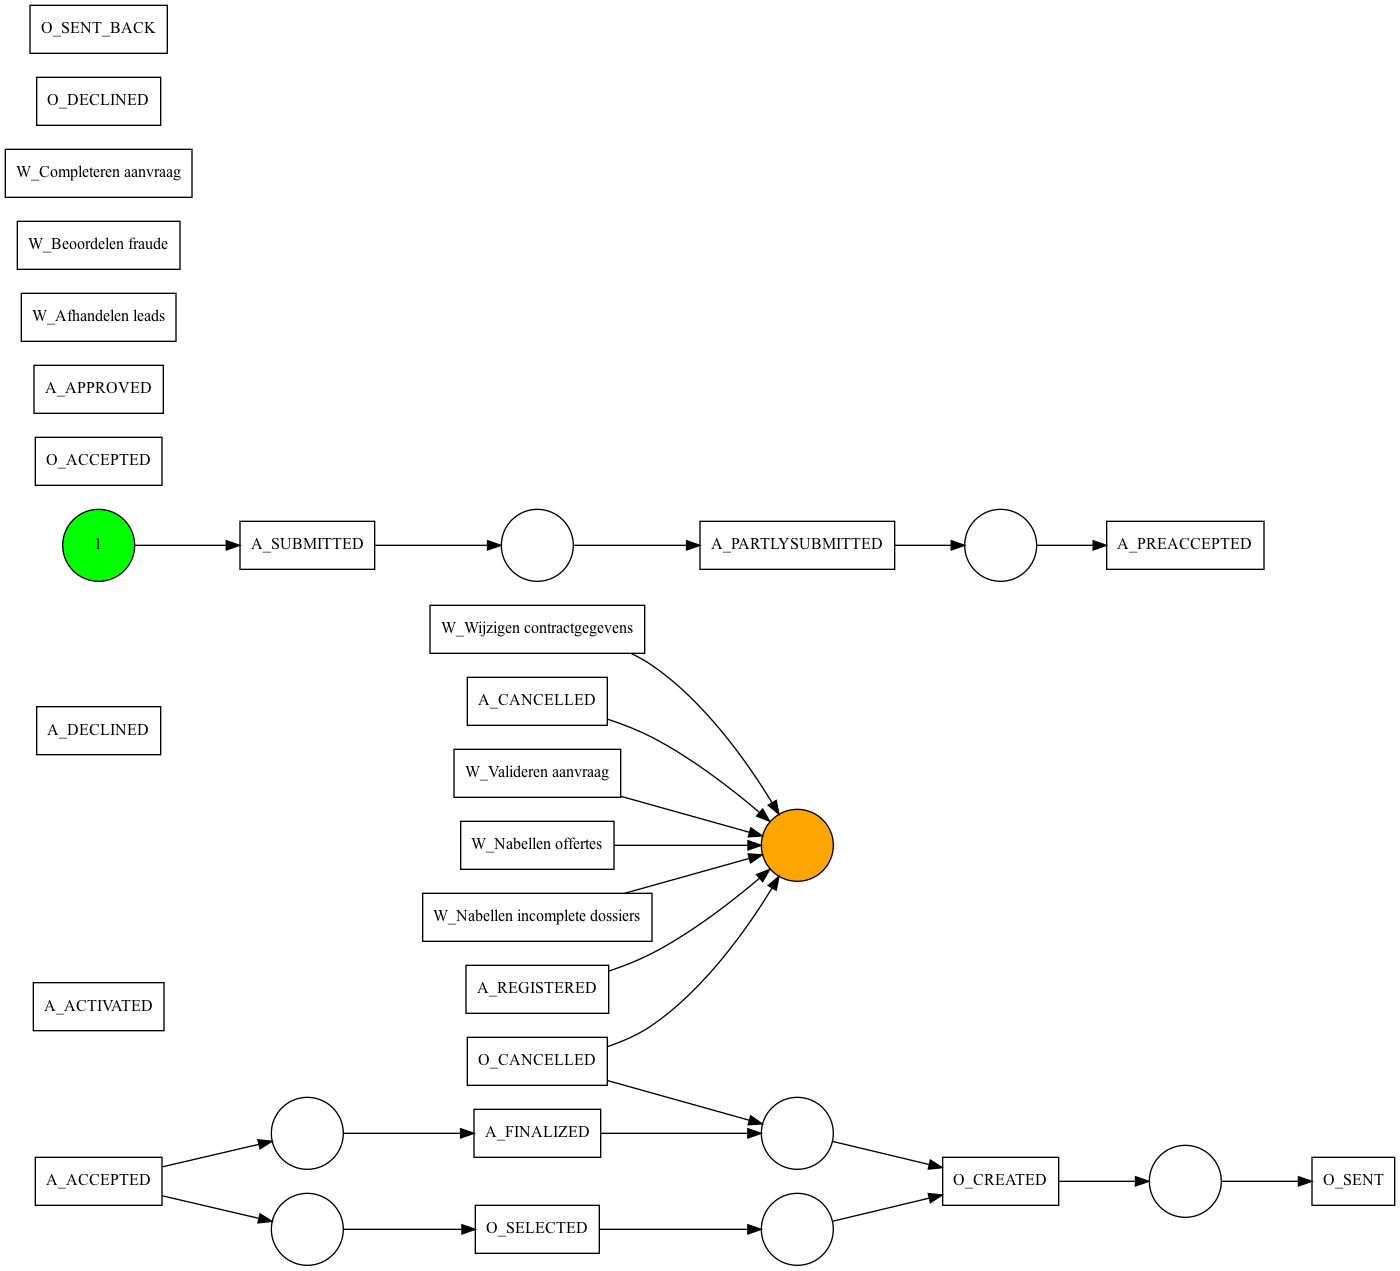

In [36]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [37]:
net,im, fm = alpha_miner.apply(sub_log4)
fitness = replay_fitness_evaluator.apply(sub_log4, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 28746/28746 [01:02<00:00, 459.97it/s]


Fitness of Petrinet is:  64.63058103022938 %
Precision of Petrinet is:  9.169982558534617 %
Simplicity of Petrinet is:  100.0 %


# DB SCAN

## Hamming Distance

In [48]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=.2, min_samples=1, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[4981 8072    6   20    2    1    1    1    1    1    1]


### Size of Clusters

In [49]:
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[4981 8072    6   20    2    1    1    1    1    1    1]


### Taking first 5 clusters

## Creating Sub Event Logs based on Clustering Output

In [50]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
length3 = count_arr_DB1[2]
length4 = count_arr_DB1[3]
length5 = count_arr_DB1[4]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
sub_log3_DB1 = EventLog()
sub_log4_DB1 = EventLog()
sub_log5_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    elif clustering_DB_Hamm[i] == 2: 
        sub_log3_DB1.append(log[i])

    elif clustering_DB_Hamm[i] == 3: 
        sub_log4_DB1.append(log[i])

    elif clustering_DB_Hamm[i] == 4: 
        sub_log5_DB1.append(log[i])

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

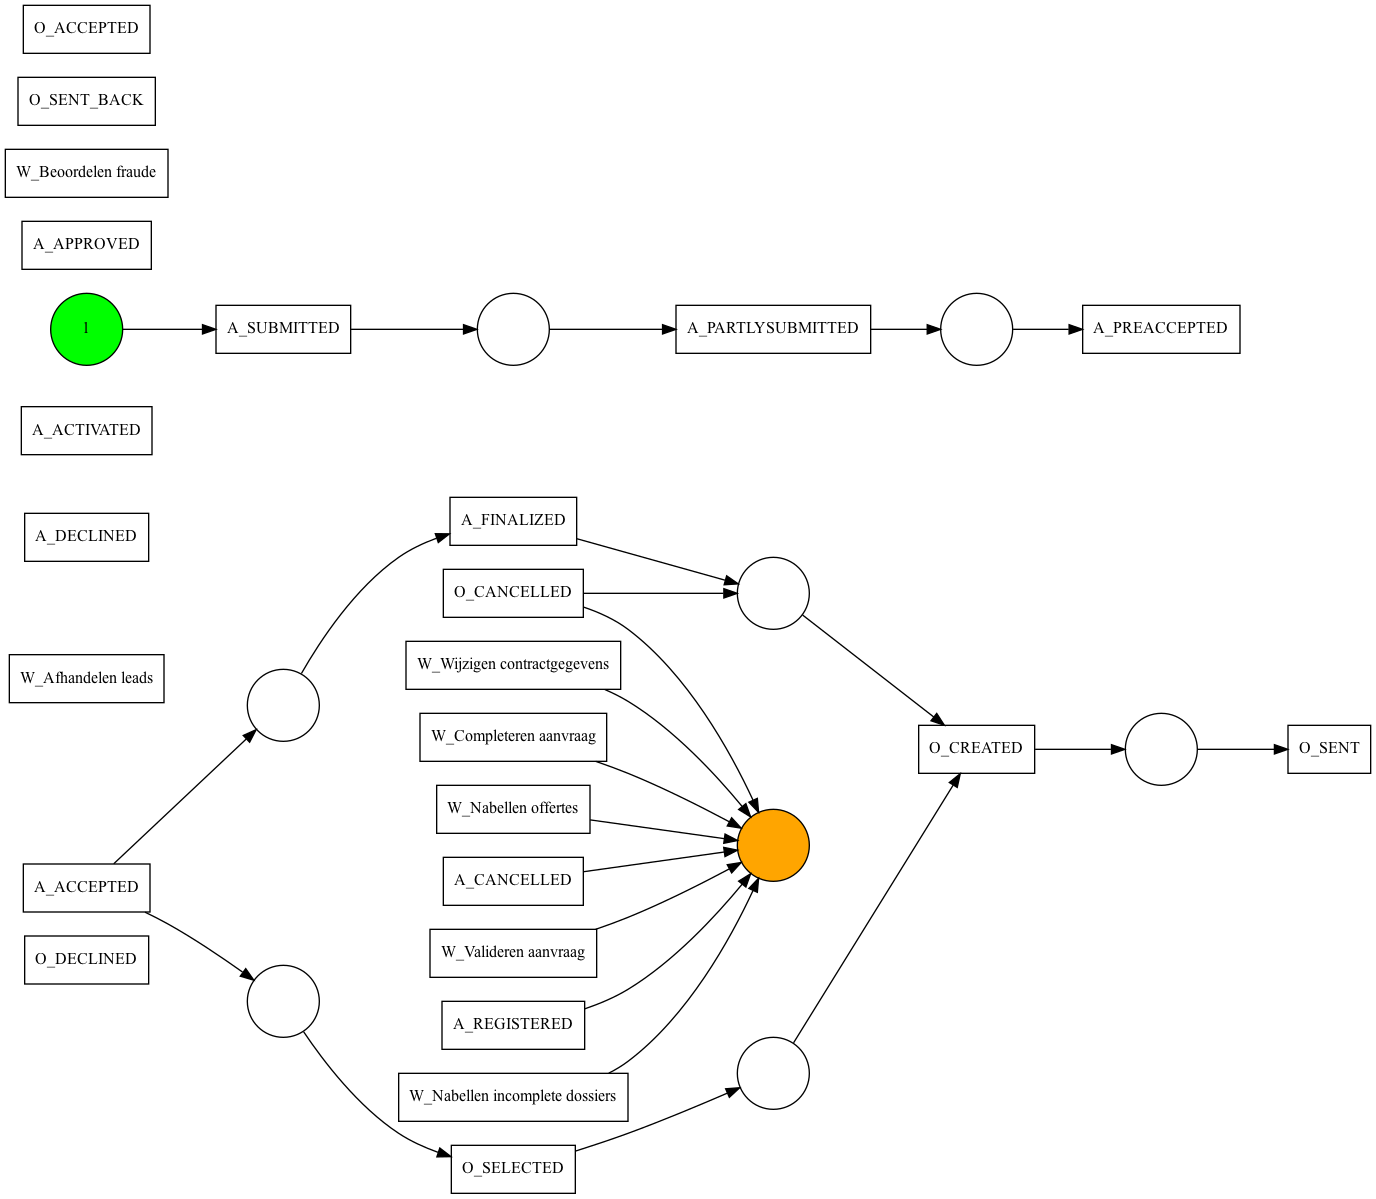

In [51]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [52]:
net, im, fm = alpha_miner.apply(sub_log1_DB1)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 54371/54371 [02:19<00:00, 389.46it/s]


Fitness of Petrinet is:  62.231399920211096 %
Precision of Petrinet is:  9.877612845719986 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

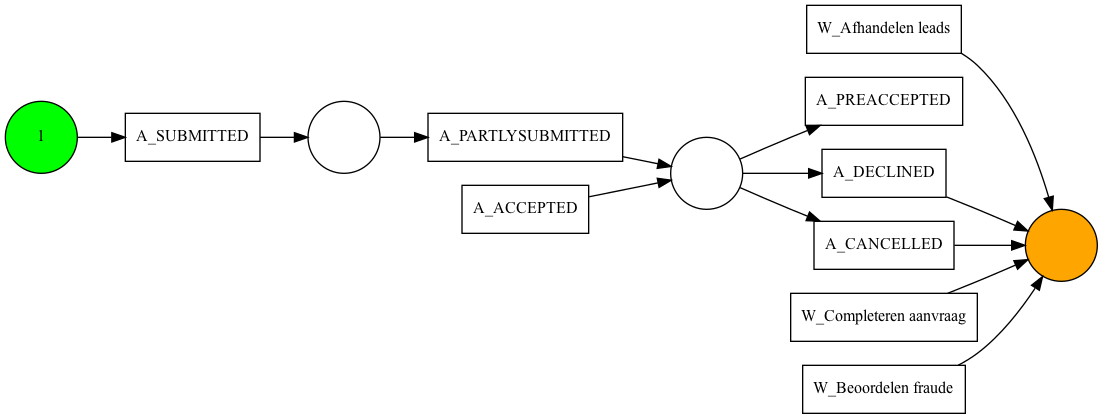

In [53]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [54]:
net, im, fm = alpha_miner.apply(sub_log2_DB1)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 841/841 [00:00<00:00, 915.14it/s]

Fitness of Petrinet is:  69.91489608659916 %
Precision of Petrinet is:  33.97055081351257 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

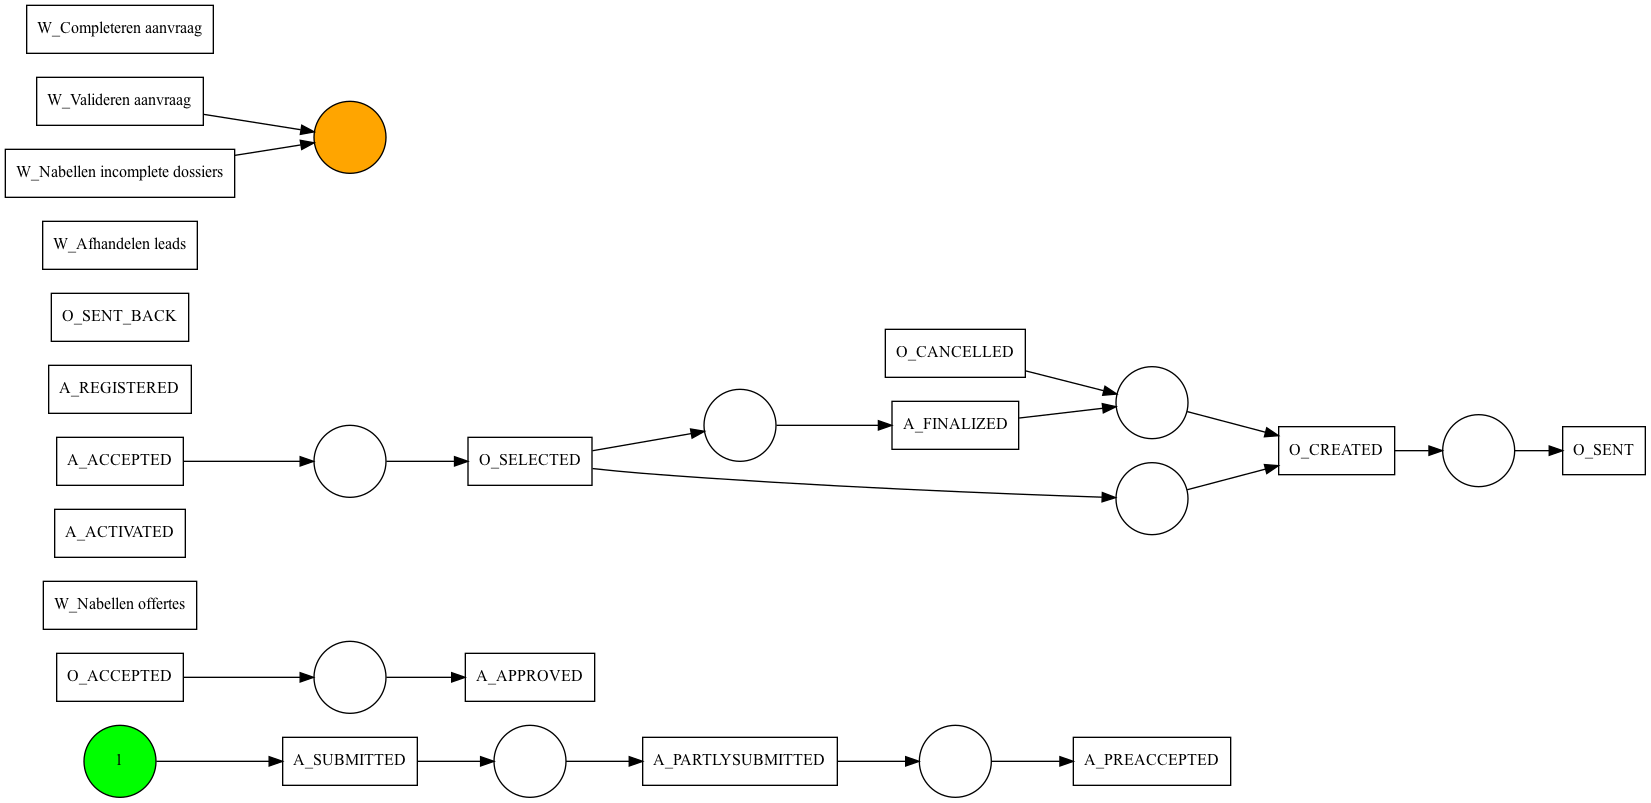

In [55]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [56]:
net, im, fm = alpha_miner.apply(sub_log3_DB1)
fitness = replay_fitness_evaluator.apply(sub_log3_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 483/483 [00:00<00:00, 566.97it/s]

Fitness of Petrinet is:  66.99026345933562 %
Precision of Petrinet is:  9.399075500770415 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 4

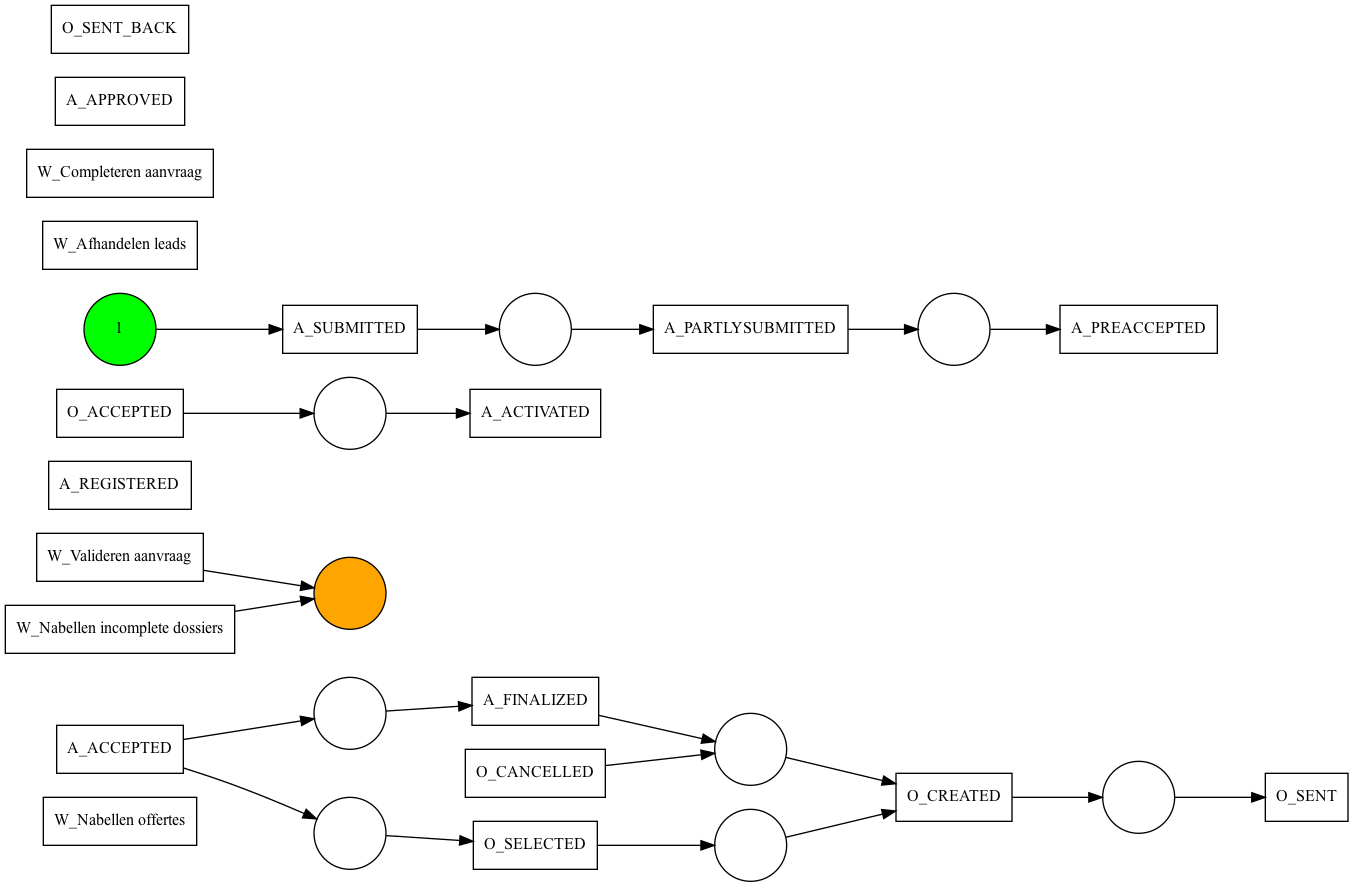

In [57]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 4

In [58]:
net, im, fm = alpha_miner.apply(sub_log4_DB1)
fitness = replay_fitness_evaluator.apply(sub_log4_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 1291/1291 [00:01<00:00, 777.77it/s]

Fitness of Petrinet is:  67.94424655063575 %
Precision of Petrinet is:  10.130944176430045 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 5

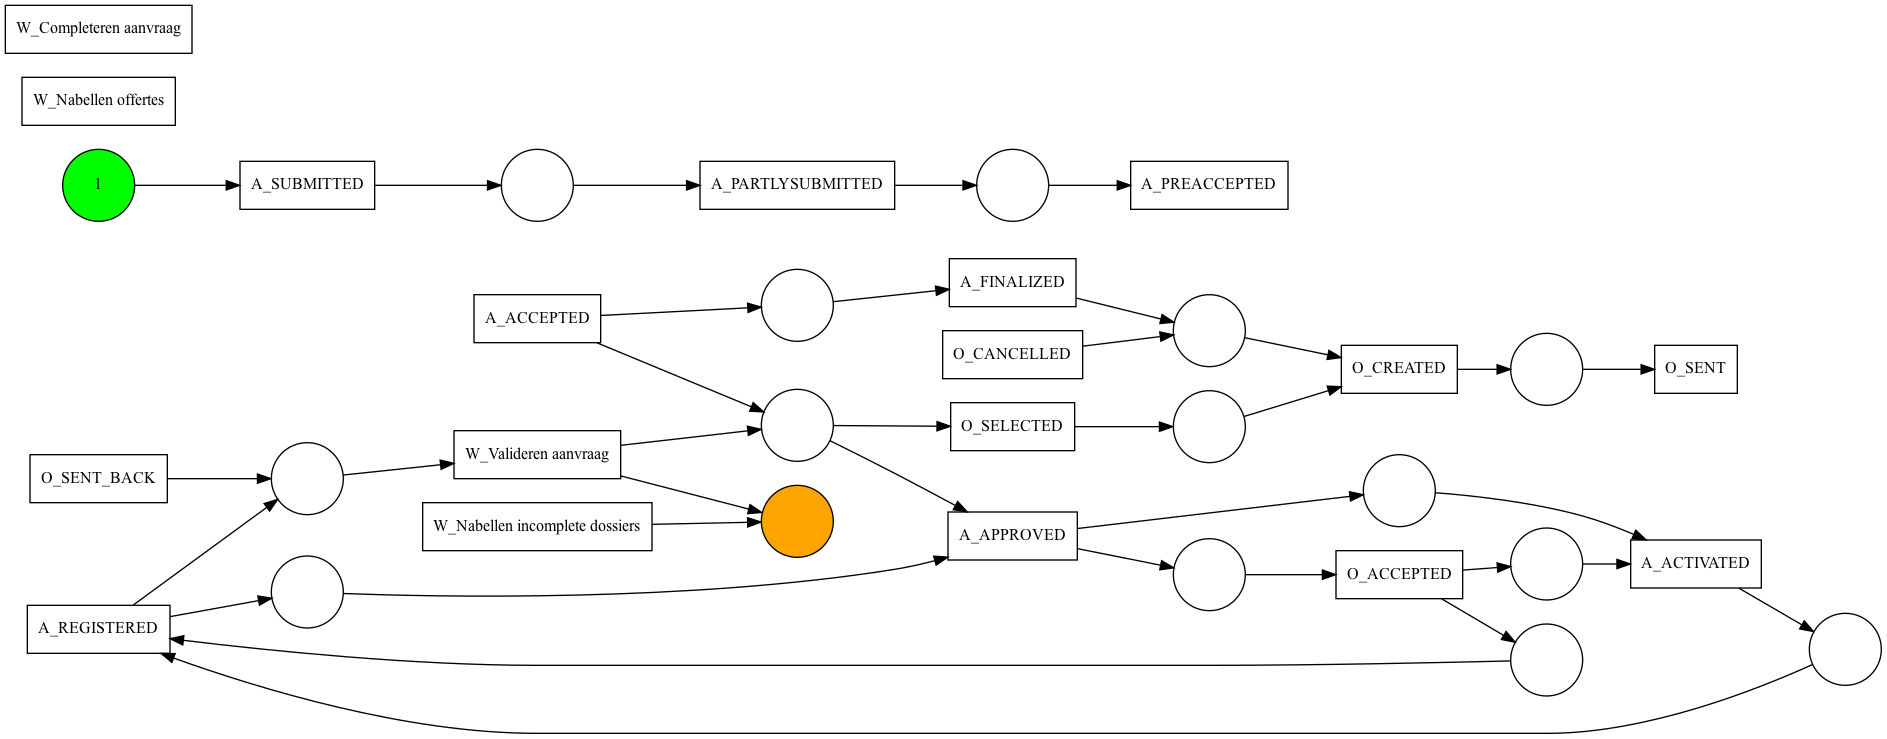

In [59]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log5_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 5

In [60]:
net, im, fm = alpha_miner.apply(sub_log5_DB1)
fitness = replay_fitness_evaluator.apply(sub_log5_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log5_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 194/194 [00:00<00:00, 917.21it/s]

Fitness of Petrinet is:  65.19838856795378 %
Precision of Petrinet is:  15.454545454545453 %
Simplicity of Petrinet is:  94.44444444444446 %
